In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc


In [14]:
font_path = '../resData/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [15]:
df = pd.read_excel('../resData/시도별_전출입_인구수.xlsx', engine='openpyxl', header=0)
df = df.ffill()
print(df.head())
mask = (df['전출지별']=='서울특별시') & (df['전입지별']!='서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)


   전출지별   전입지별      1970      1971      1972      1973      1974      1975  \
0  전출지별   전입지별  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)   
1    전국     전국   4046536   4210164   3687938   4860418   5297969   9011440   
2    전국  서울특별시   1742813   1671705   1349333   1831858   2050392   3396662   
3    전국  부산광역시    448577    389797    362202    482061    680984    805979   
4    전국  대구광역시         -         -         -         -         -         -   

       1976      1977  ...      2008      2009      2010      2011      2012  \
0  이동자수 (명)  이동자수 (명)  ...  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)   
1   6773250   7397623  ...   8808256   8487275   8226594   8127195   7506691   
2   2756510   2893403  ...   2025358   1873188   1733015   1721748   1555281   
3    724664    785117  ...    514502    519310    519334    508043    461042   
4         -         -  ...    409938    398626    370817    370563    348642   

       2013      2014      2015      2016      201

In [16]:
col_years = list(map(str, range(2010, 2018)))
# 연도를 적용하여 각 4개의 도를 추출
df4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]

In [17]:
df4['합계'] = df4.sum(axis=1)

In [18]:
df_total = df4[['합계']].sort_values(by='합계', ascending=True)
print(df_total)

          합계
전입지         
전라남도  116035
경상북도  117740
강원도   175731
충청남도  179533


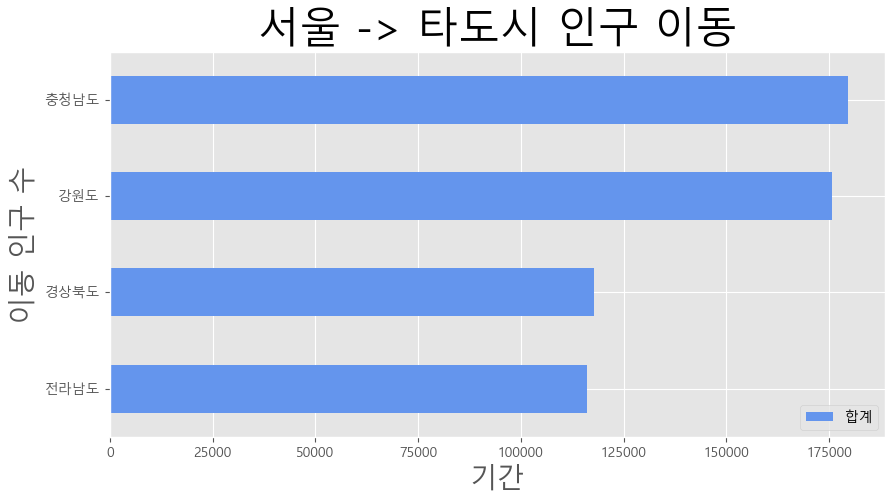

In [19]:
plt.style.use('ggplot')
# 수평 형태의 막대그래프(kind='barh') 생성.
df_total.plot(kind='barh', color='cornflowerblue', width=0.5, figsize=(10,5))

# 라벨 설정
plt.title('서울 -> 타도시 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)

plt.show()
